<a href="https://colab.research.google.com/github/pedro-nog-9/export_2022/blob/main/Exporta%C3%A7%C3%B5es_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise simples das exportações brasileiras de 2022**
Como os US$ 334,1 Bi foram exportados através dos meses, por estado e em quais modais

## Leitura inicial dos dados fornecidos pelo Ministério da Economia

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dados = pd.read_csv('EXP_2022.csv', sep = ';')
dados

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2022,6,85045000,11,69,MG,4,817600,2,1399,19576
1,2022,4,39219019,10,586,SP,7,917500,3914,3914,12672
2,2022,1,44071100,16,249,SC,1,927800,21945,8409167,5177394
3,2022,11,84672100,11,521,RS,1,817800,10,25,487
4,2022,10,8072000,10,23,RN,4,417901,55356,55356,71511
...,...,...,...,...,...,...,...,...,...,...,...
1495863,2022,11,32061910,10,845,SP,7,1010252,975,975,5489
1495864,2022,1,12024200,10,434,AM,1,227600,4,4,26
1495865,2022,9,18040000,21,249,BA,1,517800,180,180000,1295568
1495866,2022,8,16010000,10,99,SC,1,927800,1820,1820,1930


In [7]:
# Detalhamento inicial da base de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495868 entries, 0 to 1495867
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   CO_ANO      1495868 non-null  int64 
 1   CO_MES      1495868 non-null  int64 
 2   CO_NCM      1495868 non-null  int64 
 3   CO_UNID     1495868 non-null  int64 
 4   CO_PAIS     1495868 non-null  int64 
 5   SG_UF_NCM   1495868 non-null  object
 6   CO_VIA      1495868 non-null  int64 
 7   CO_URF      1495868 non-null  int64 
 8   QT_ESTAT    1495868 non-null  int64 
 9   KG_LIQUIDO  1495868 non-null  int64 
 10  VL_FOB      1495868 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 125.5+ MB


In [8]:
# Não possui itens nulos, não é preciso tratar isso
# Todos os valores são inteiros com a excessão da coluna dos Estados.
# São 11 colunas e 1.495.868 linhas

## 1. Total exportado por mês

In [10]:
# colocando os nomes dos meses
# convertendo para Bilhões de US$

mes = {1: 'Jan', 2:'Fev', 3:'Mar', 4: 'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}
colunas = {'': 'US$ Bi'}

val_mes = pd.crosstab('', dados.CO_MES, aggfunc = 'sum', values = dados.VL_FOB/1000000000)
val_mes.rename(columns = mes, inplace = True)
val_mes.rename_axis('Meses', axis = 'columns', inplace = True)
val_mes.rename_axis('', axis = 'rows', inplace = True)
val_mes.rename(index = colunas, inplace = True)
val_mes.T

,US$ Bi
Meses,
Jan,19.779929
Fev,23.513305
Mar,29.422320
Abr,28.969695
Mai,29.642851
Jun,32.742195
Jul,29.844325
Ago,30.786909
Set,28.587334


<AxesSubplot:title={'center':'Exportações brasileiras por mês - 2022 (US$ Bi)'}, xlabel='Meses'>

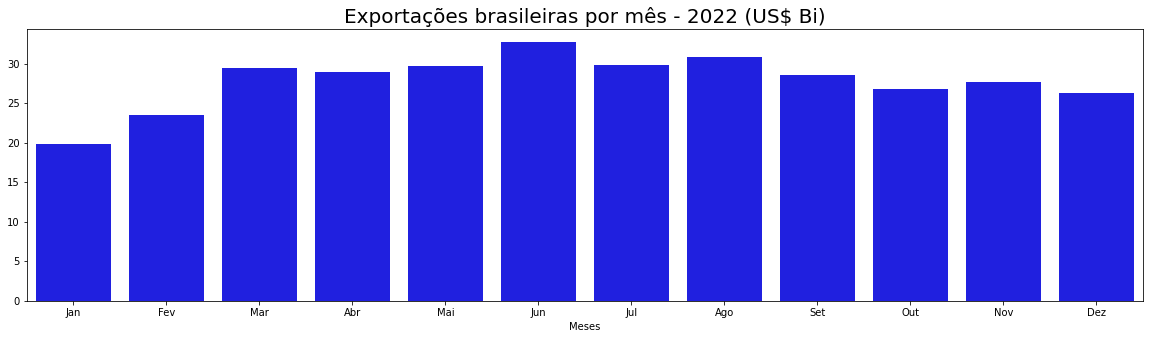

In [11]:
# Gráfico de barras com o valor das exportações mensais

ax = sns.barplot(data = val_mes, color = 'blue')
ax.figure.set_size_inches(20, 5)
ax.set_title('Exportações brasileiras por mês - 2022 (US$ Bi)', fontsize=20)
ax

## 2. Total exportado por Estado

In [13]:
# Gerando a tabela de valores por estado

colunas = {'':'US$ Bi'}

val_est = pd.crosstab('', dados.SG_UF_NCM, aggfunc = 'sum', values = dados.VL_FOB/1000000000)
val_est.rename_axis('', axis = 'rows', inplace = True)
val_est.rename_axis('Estado', axis = 'columns', inplace = True)
val_est.sort_values(by='', axis = 1, ascending = False, inplace = True)
val_est.rename(index = colunas, inplace = True)
val_est.T

,US$ Bi
Estado,
SP,69.630558
RJ,45.513895
MG,40.194082
MT,32.507577
RS,22.564741
PR,22.132924
PA,21.515318
GO,14.147957
BA,13.922502


<AxesSubplot:title={'center':'(US$ Bi) Exportações brasileiras por Estado - 2022'}, xlabel='Estado'>

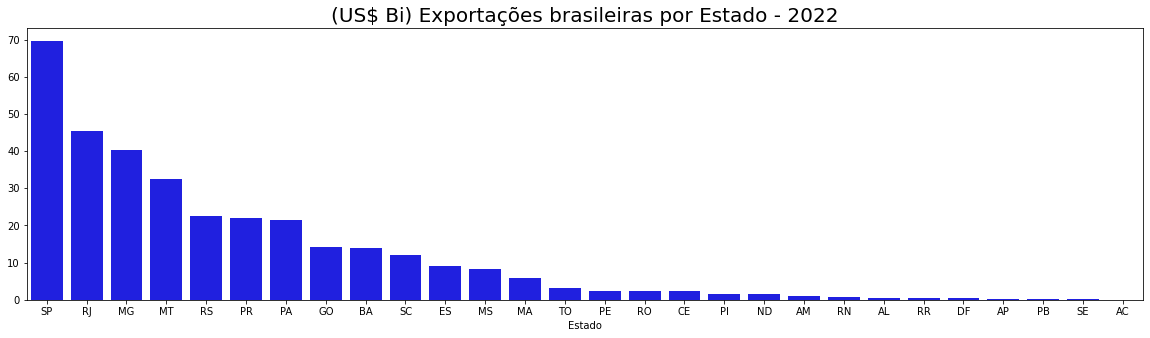

In [14]:
# Gerando o gráfico das exportações por estado

ax = sns.barplot(data = val_est, color = 'blue')
ax.figure.set_size_inches(20, 5)
ax.set_title('(US$ Bi) Exportações brasileiras por Estado - 2022', fontsize=20)
ax

## 3. Modais utilizados nas exportações

Em um arquivo cvs separado, o Ministério da Economia fornece uma tabela de códigos para conversão, eis abaixo a conversão dos modais da coluna 'CO_FIA' que utilizaremos adiante na elaboração de uma Series e posteriormente gerar o gráfico


In [15]:
vias = {0: 'Não Declarada',
        1: 'Marítima',
        2: 'Fluvial',
        3: 'Lacustre',
        4: 'Aérea',
        5: 'Postal',
        6: 'Ferroviária',
        7: 'Rodoviária',
        8: 'Conduto/Rede de Transmissão',
        9: 'Meios Próprios',
        10: 'Entrada/Saída Ficta',
        11: 'Courier',
        12: 'Em mãos',
        13: 'Por Reboque',
        14: 'Dutos',
        15: 'Vicinal Fronteiriço',
        99: 'Desconhecida'}
transporte = pd.Series(dados.CO_VIA.value_counts())
transporte.rename(index = vias, inplace = True)
transporte

Marítima                       756195
Aérea                          439154
Rodoviária                     266572
Vicinal Fronteiriço             17284
Não Declarada                   13098
Em mãos                          1630
Meios Próprios                   1480
Ferroviária                       367
Fluvial                            58
Conduto/Rede de Transmissão         9
Lacustre                            9
Por Reboque                         6
Dutos                               6
Name: CO_VIA, dtype: int64

O gráfico de pizza não é gerado a partir de um DataFrame e nem de uma Series (formato em que se encontram os dados nessa célula anterior), para um gráfico de pizza é necessário decompor essa Series em listas

In [26]:
#Decompondo a Series em listas:

transporte = pd.Series(dados.CO_VIA.value_counts())
transporte.rename(index = vias, inplace = True)
modal = transporte.index.tolist()
qtd = transporte.tolist()
explode = (0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5)

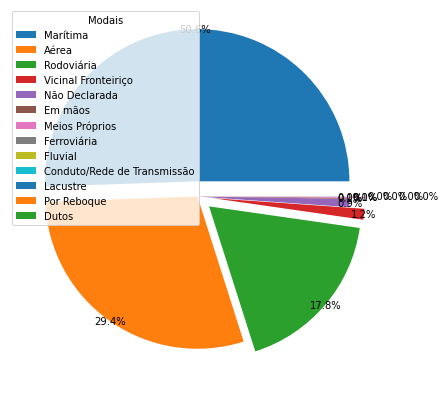

In [27]:
# gerando o gráfico de pizza

fig = plt.figure(figsize = (20, 7))
plt.pie(qtd, pctdistance = 1, explode = explode, autopct = '%1.1f%%')
plt.legend(modal, loc = 'upper left', title = 'Modais')

plt.show()

Repare que, por ter muitas opções, o matplot repetiu as 3 últimas cores, que, mesmo sendo irrelevantes no montante total (Dutos, 6 ocorrências; Por reboque, 6; Lacustre, 9 e Conduto/Rede com 9), precisam ser retiradas para fins de organização

In [29]:
# apagando os 4 últimos da lista e substituindo por 'Outros'

for i in range(4):
  modal.pop()
  qtd.pop()

qtd.append(6+6+9+9)
modal.append('Outros')
explode = (0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.2)

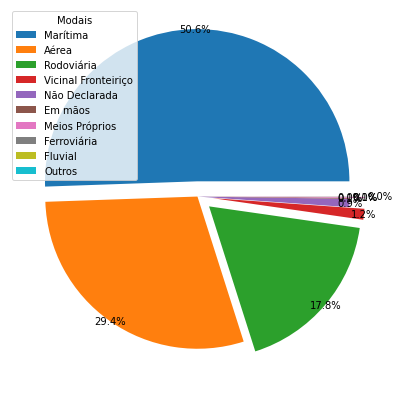

In [30]:
# gerando o novo gráfico

fig = plt.figure(figsize = (20, 7))
plt.pie(qtd, pctdistance = 1, explode = explode, autopct = '%1.1f%%')
plt.legend(modal, loc = 'upper left', title = 'Modais')

plt.show()

## 4. Conclusão

Podemos perceber aqui, que o mês de junho apresentou o maior montade exportado; São Paulo é consideravelmente o estado mais exportador em valores e; os principais modais utilizados na saída de cargas do país são: marítimo, aéreo e rodoviário com, respectivamente, 50,6%, 29,4% e 17,8% de participação.